<a href="https://colab.research.google.com/github/aleks-haksly/AI/blob/main/L1/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential # импортируем класс создания модели (последовательный)
from keras.layers import Dense # импортируем полносвязные слои
import seaborn as sns

In [2]:
import numpy as np

In [3]:
model = Sequential()
# 1. добавляем полносвязный слой с 2 входами и 2 выходами
model.add(Dense(2,input_dim=2, use_bias=False))
# 2. далее еще один слой число входов авто, число выходов 1.
model.add(Dense(1, use_bias=False))

In [4]:
#use_bias=True значит, что outputs = inputs * weights + вектор bias. В нашем случае мы это не спользуем и ветор bias не обучаем

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Non-trainable params: параметры, которые не требуется изменять при обучении модели

In [7]:
# При создании модели веса генерируются автоматически случайным образом.
weights = model.get_weights()
weights

[array([[ 0.5199573 , -0.44582796],
        [-0.20224261,  1.2053028 ]], dtype=float32),
 array([[-0.6222041 ],
        [-0.06390941]], dtype=float32)]

In [8]:
# Также их можно установить вручную
w1 = 0.42
w2 = 0.15
w3 = -0.56
w4 = 0.83
w5 = 0.93
w6 = 0.02
# Веса в 1 и 2 слоях
L1 = np.array([[w1, w3],[w2, w4]])
L2 = np.array([[w5,], [w6,]])
model.set_weights([L1, L2])

In [9]:
model.get_weights()

[array([[ 0.42, -0.56],
        [ 0.15,  0.83]], dtype=float32),
 array([[0.93],
        [0.02]], dtype=float32)]

In [10]:
# Положим входные значения равны:
X1 = 7.2
X2 = -5.8

In [11]:
# создаем входной набор данных
x_train  = np.expand_dims(np.array([X1, X2]), 0) # ~reshape чтобы был двумерный набор, для этого добавляем ось
x_train

array([[ 7.2, -5.8]])

In [12]:
model.predict(x_train) # Предикт от модели, также он просто равен произведению матриц

1/1 [==============================] - 0s 126ms/step


array([[1.8262998]], dtype=float32)

In [13]:
np.matmul(np.array([X1, X2]), L1) # То же, что и np.array([X1, X2]) @ L1

array([ 2.154, -8.846])

In [14]:
np.array([X1, X2]) @ L1 @ L2 # Предикт от модели, также он просто равен произведению матриц

array([1.8263])

### Функция активации ###
Если бы функция активации нейронов была бы линейной, но можно было выполнить преобразование: Output = Input * W1 * W2 при этом $\exists$ W3 -> W3 = W1 * W2. То есть использование нескольких слоев не имело бы смысла. Но она не линейна.
Чаще всего используют ф-ции:

<Axes: >

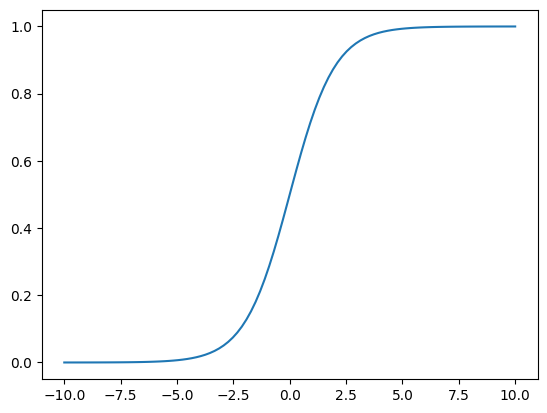

In [33]:
# sigmoid сигмоид
sns.lineplot(x=np.linspace(-10, 10, 100), y = [1 / (1 + np.exp(-x)) for x in np.linspace(-10, 10, 100)])

<Axes: >

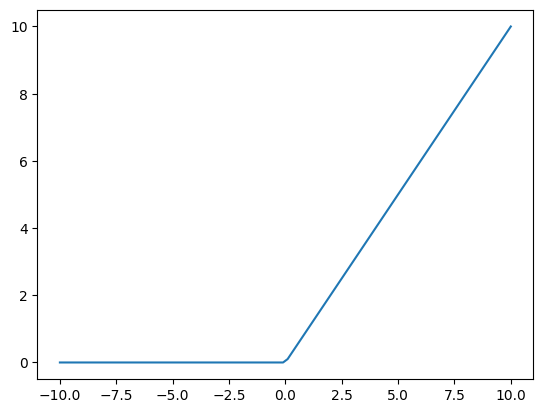

In [30]:
#relu линейный выпрямитель
sns.lineplot(x=np.linspace(-10, 10, 100), y = [x if x > 0 else 0 for x in np.linspace(-10, 10, 100)])

<Axes: >

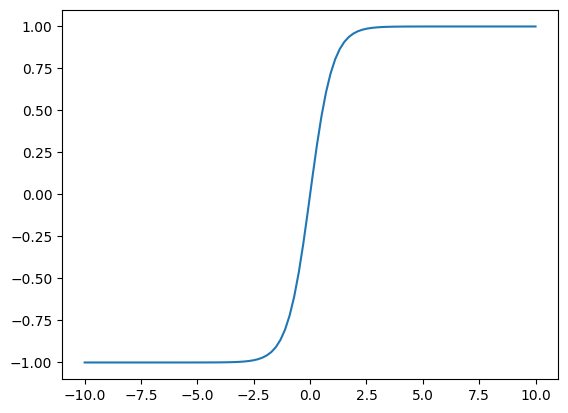

In [34]:
# tanh гиперболический тангенс
sns.lineplot(x=np.linspace(-10, 10, 100), y = [(np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)) for x in np.linspace(-10, 10, 100)])

In [ ]:
#softmax